In [7]:
#IMPORT NECESSARY PACKAGES
import CO2_functions
import CO2_Processing
import pandas as pd
from CO2_functions import *
from CO2_Processing import *
import matplotlib.pyplot as plt
import pickle
import numpy as np
pd.options.display.max_rows = 999
from datetime import datetime
import os

In [8]:
import importlib
importlib.reload(CO2_functions)
importlib.reload(CO2_Processing)

from CO2_functions import *
from CO2_Processing import *

In [9]:
data_orig = retrieve_data_from_folder('Z:\\CO2_Data_Final','2019-08-15','2019-08-21')

Retrieving data for 2019-08-15
Retrieving data for 2019-08-16
Retrieving data for 2019-08-17
Retrieving data for 2019-08-18
Retrieving data for 2019-08-19
Retrieving data for 2019-08-20
Retrieving data for 2019-08-21


In [10]:
data = remove_spikes(pd.read_pickle('Spike_ETs.pkl'),data_orig)
data = downsample_and_concatenate(data) 
data = combine_vent_data(data,1)
data['Vent_Mass'] = moving_mass_flow(data['Vent_Mass'])

Concatenating Picarro Data
Concatenating Multi Data
setting night vent data to zero


In [ ]:
def baseline_from_WBB(data_dict):
    wbb.resample('0.1S').interpolate()

In [11]:
pic = data['Picarro'].copy()
wbb = data['WBB_CO2'].copy()

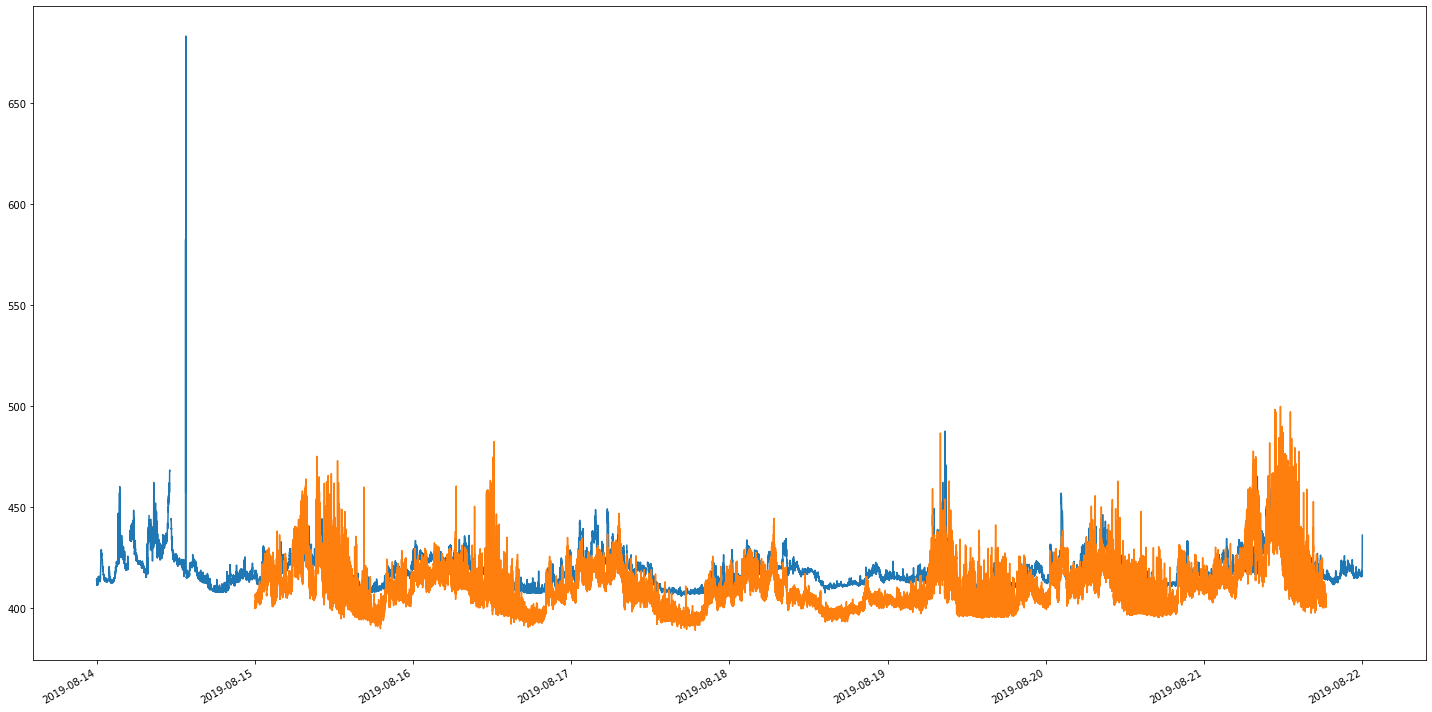

Is this an acceptable range?  y


[             Corrected_DT    EPOCH_TIME  WBB_CO2  WBB_CH4  DOW
 0     2019-08-14 00:00:00  1.565762e+09  414.032  1.91805    2
 1     2019-08-14 00:00:10  1.565762e+09  413.970  1.91712    2
 2     2019-08-14 00:00:20  1.565762e+09  414.498  1.92125    2
 3     2019-08-14 00:00:30  1.565762e+09  414.507  1.91982    2
 4     2019-08-14 00:00:40  1.565762e+09  413.593  1.91673    2
 ...                   ...           ...      ...      ...  ...
 69115 2019-08-21 23:59:10  1.566454e+09  431.356  1.96219    2
 69116 2019-08-21 23:59:20  1.566454e+09  433.888  1.97183    2
 69117 2019-08-21 23:59:30  1.566454e+09  434.980  1.97097    2
 69118 2019-08-21 23:59:40  1.566454e+09  436.013  1.97782    2
 69119 2019-08-21 23:59:50  1.566454e+09  436.224  1.98751    2
 
 [69120 rows x 5 columns],
                    Corrected_DT     Pic_CO2   Pic_CH4  Pic_Loc    ANEM_Y  \
 0       2019-08-14 23:58:27.300  401.876046  1.720211      1.0       NaN   
 1       2019-08-14 23:58:27.400  401.959349  1.7

In [16]:
plot_refinement_all([[data['WBB_CO2'],'Corrected_DT','WBB_CO2'],[data['Picarro'],'Corrected_DT','Pic_CO2']],'stack')

In [19]:
wind['rolling_x'] = wind['ANEM_X'].rolling(1000,center=True).mean()
wind['rolling_y'] = wind['ANEM_Y'].rolling(10,center=True).mean()
wind['rolling_z'] = wind['ANEM_Z'].rolling(10,center=True).mean()

C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [12]:
pic['std'] = pic['Pic_CO2'].rolling(1000,center=True).std()
pic['mean'] = pic['Pic_CO2'].rolling(1000,center=True).mean()
pic['baseline'] = pic.apply(lambda row: row['mean']+(-2.326)*row['std'],axis=1)
pic['baseline2']= pic['baseline'].rolling(1000,center=True).mean()

In [20]:
pic['baseline2']= pic['baseline'].rolling(86400,center=True).mean()

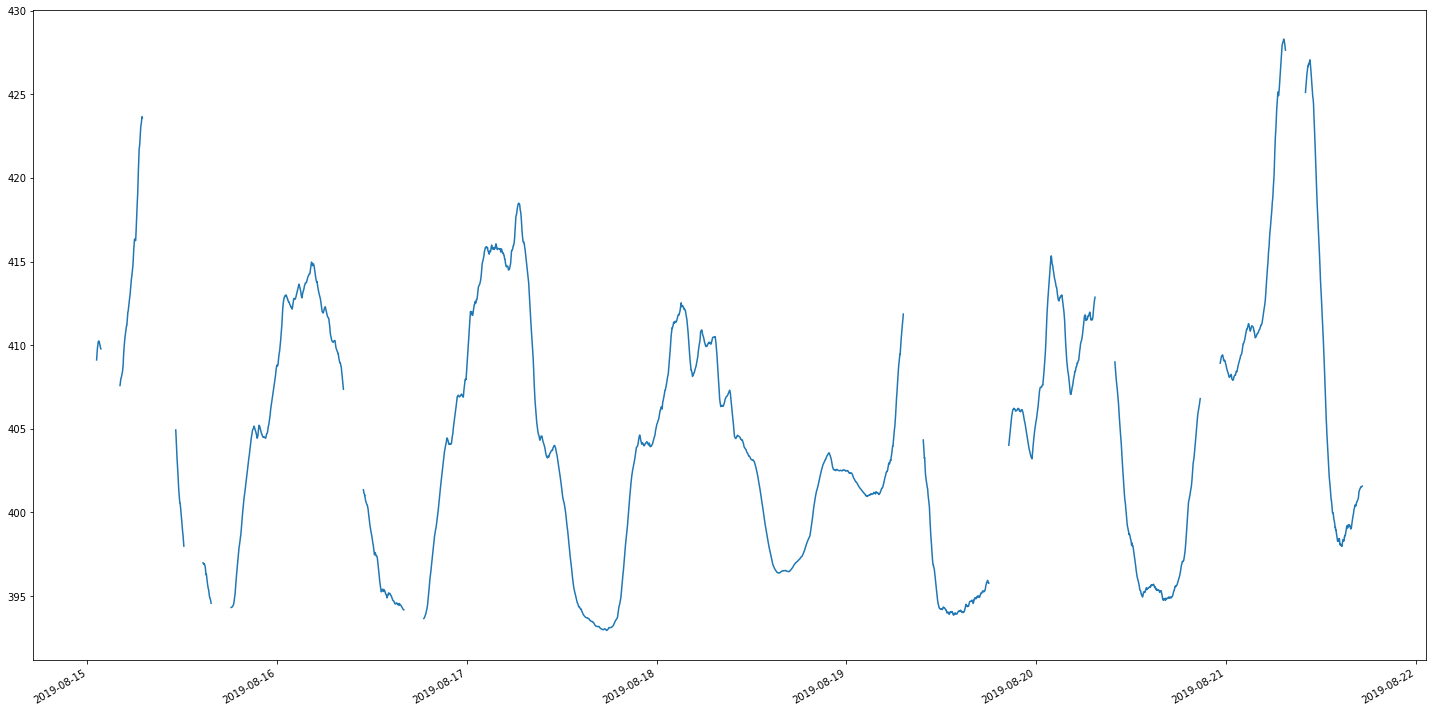

Is this an acceptable range?  y


[                   Corrected_DT     Pic_CO2   Pic_CH4  Pic_Loc    ANEM_Y  \
 0       2019-08-14 23:58:27.300  401.876046  1.720211      1.0       NaN   
 1       2019-08-14 23:58:27.400  401.959349  1.723037      1.0       NaN   
 2       2019-08-14 23:58:27.500  402.202095  1.724702      1.0       NaN   
 3       2019-08-14 23:58:27.600  402.147756  1.718474      1.0       NaN   
 4       2019-08-14 23:58:27.700  402.332928  1.722645      1.0       NaN   
 ...                         ...         ...       ...      ...       ...   
 5853195 2019-08-21 18:33:46.800         NaN       NaN      NaN -1.750213   
 5853196 2019-08-21 18:33:46.900         NaN       NaN      NaN -1.687706   
 5853197 2019-08-21 18:33:47.000         NaN       NaN      NaN -1.595319   
 5853198 2019-08-21 18:33:47.100         NaN       NaN      NaN -1.612385   
 5853199 2019-08-21 18:33:47.200         NaN       NaN      NaN -1.615745   
 
            ANEM_X    ANEM_Z  DOW  std  mean  baseline  baseline2  
 0    

In [23]:
plot_refinement_all([[pic,'Corrected_DT','baseline2']],'stack')

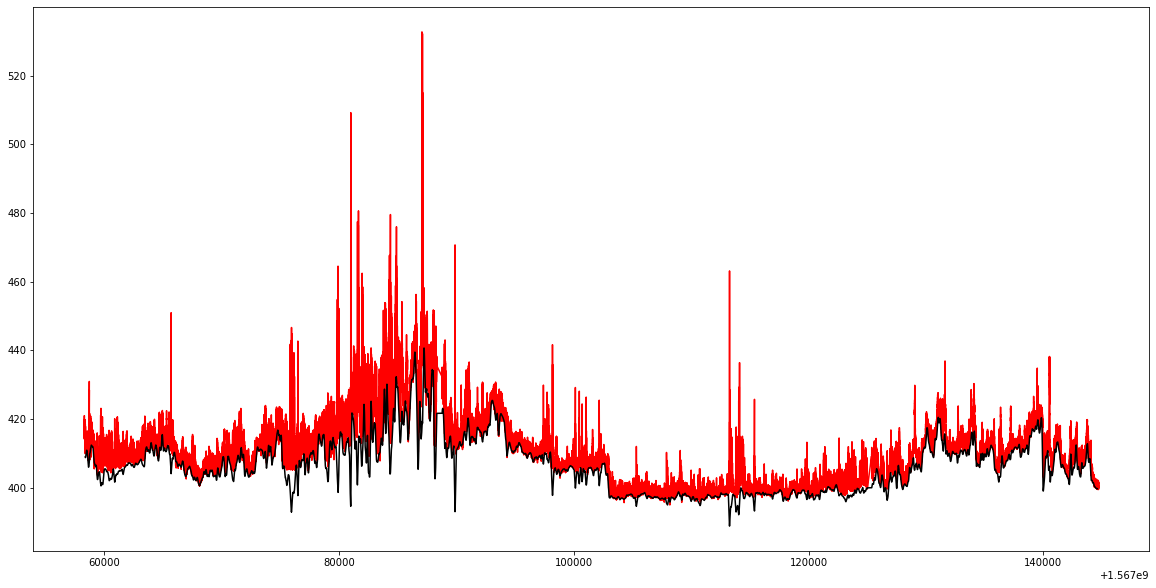

In [15]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(20,10))
ax.plot(x['Corrected_ET'],x['CO2'],color = 'red')
ax.plot(x['Corrected_ET'],x['baseline2'],color='black')